**Task 1**

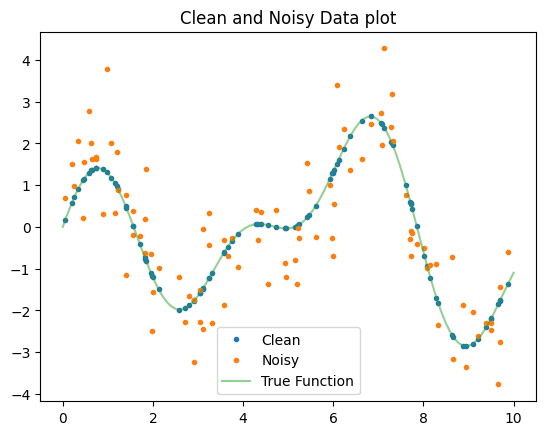

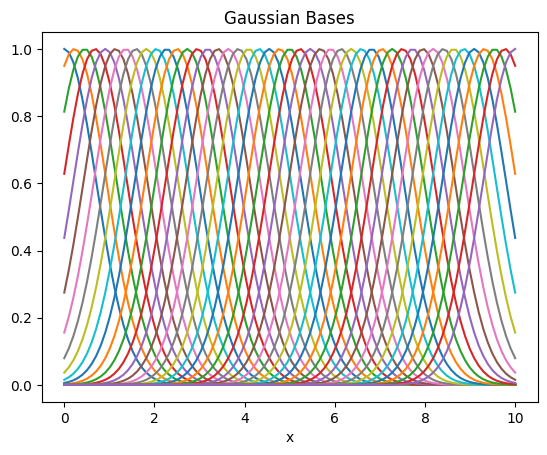

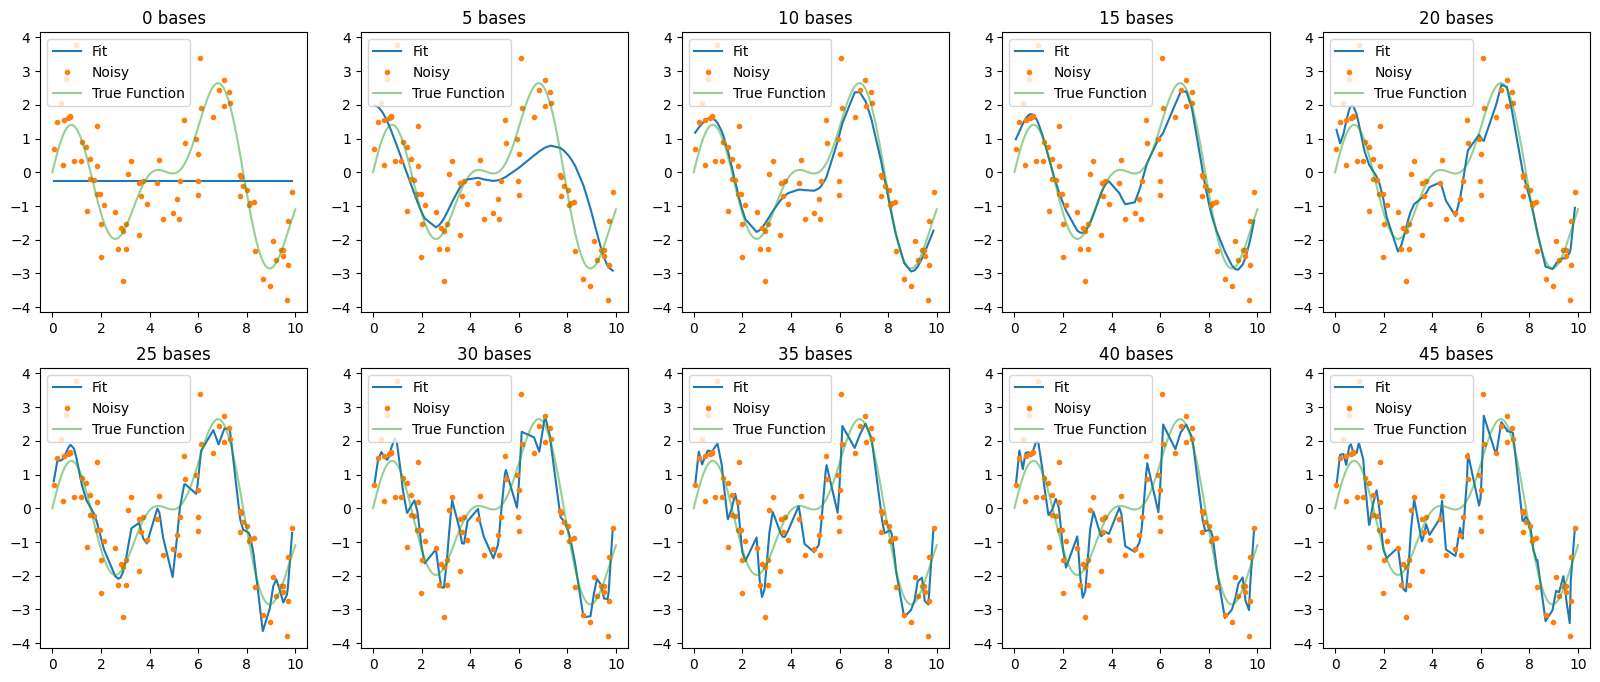

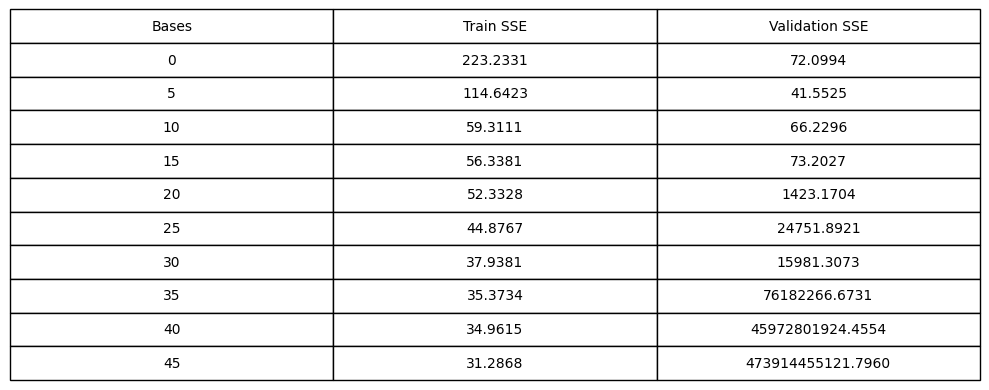

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(42)#set seed for reproducibility
#get our sample data
x = np.random.rand(100) * 10
epsilon = np.random.normal(0,1,100)

#function definitions
f_clean = lambda x : np.log(x+1) * np.cos(x) + np.sin(2*x)
f_noise = lambda x : np.log(x+1) * np.cos(x) + np.sin(2*x) + epsilon
y_clean = f_clean(x)
y_noise = f_noise(x)
x_uniform = np.linspace(0,10,100)
true_y = f_clean(x_uniform)

#Split Data 80/20 split as usual
#TODO
X_train = x[:80]
X_test = x[80:]
Y_train = y_noise[:80]
Y_test = y_noise[80:]
#sort for better visualization
#sort test splits
sorted_train = np.argsort(X_train)
sorted_test = np.argsort(X_test)
X_train = X_train[sorted_train]
X_test = X_test[sorted_test]
Y_train = Y_train[sorted_train]
Y_test = Y_test[sorted_test]

sorted_indices = np.argsort(x)
x = x[sorted_indices]
y_clean = y_clean[sorted_indices]
y_noise = y_noise[sorted_indices]

#1.1
plt.title('Clean and Noisy Data plot')
plt.plot(x, y_clean, '.', label='Clean')
plt.plot(x, y_noise, '.', label='Noisy')
#plot the true function
plt.plot(x_uniform, true_y, alpha=.5, label='True Function')
plt.legend()
plt.show()

#Gaussian Bases
#1.2
def get_bases(D,x):
    '''retuns numpy.ndarray of D Gaussian bases'''
    gaussian = lambda x, mu, sigma: np.exp(-((x-mu)/sigma)**2)
    mu = []
    for d in range(D):
        mu.append(np.min(x) + (np.max(x)-np.min(x))/(D-1) * d)
    mu = np.array(mu)
    phi = gaussian(x[:,None], mu[None,:],1)
    return phi

D=45
#plot the 45 gaussian bases
for d in range(D):
    plt.plot(x_uniform, get_bases(D,x_uniform)[:,d],'-')
plt.xlabel('x')
plt.title('Gaussian Bases')
plt.show()

class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self,x,y):
        if x.ndim == 1:
            x = x[:,None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        self.w = np.linalg.lstsq(x,y)[0]
        return self

    def predict(self,x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

#1.3 and 1.4
#Cost Function for prediction
def sse(y_predict, y_validation):
    sse = 0
    for i in range(len(y_predict)):
        sse += (y_predict[i] - y_validation[i])**2

    return sse

#to hold sse results
sses_train = [] #array to hold the sse of train set of each model
sses_validation = [] #array to hold the sse of validation set of each model

fig = plt.figure(figsize=(20, 8))
plt.subplot(2, 5, 1)
#Fit and Predict empty feature matrix since zero bases
#create empty feature matrix (0 features)
phi_train = np.empty((len(X_train), 0))  # 80 x 0 matrix
phi_test = np.empty((len(X_test), 0))  # 80 x 0 matrix
model = LinearRegression().fit(phi_train,Y_train)
yh_train = model.predict(phi_train)
plt.title('0 bases')
plt.plot(X_train, yh_train, '-', label='Fit')
plt.plot(X_train, Y_train, '.', label='Noisy')
#plot the true function
plt.plot(x_uniform, true_y, alpha=.5, label='True Function')
plt.legend()
#compute sse for the model
sses_train.append(sse(yh_train, Y_train))
yh_validation = model.predict(phi_test)
sses_validation.append(sse(yh_validation, Y_test))

#plot the remaining 9 models
for t in range(9):
    plt.subplot(2, 5, t+2)
    phi = get_bases((t+1)*5,X_train)
    phi_test = get_bases((t+1)*5,X_test)
    model = LinearRegression().fit(phi,Y_train)
    yh_train = model.predict(phi)
    plt.title(f'{(t+1)*5} bases')
    plt.plot(X_train, yh_train, '-', label='Fit')
    plt.plot(X_train, Y_train, '.', label='Noisy')
    #plot the true function
    plt.plot(x_uniform, true_y, alpha=.5, label='True Function')
    plt.legend()
    #compute sse for the model
    sses_train.append(sse(yh_train, Y_train))
    yh_validation = model.predict(phi_test)
    sses_validation.append(sse(yh_validation, Y_test))

plt.show()

#make table with sse results
basis_counts = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')

#Prepare table data
table_data = [['Bases', 'Train SSE', 'Validation SSE']]
for i, d in enumerate(basis_counts):
    table_data.append([str(d), f'{sses_train[i]:.4f}', f'{sses_validation[i]:.4f}'])

#Create table
table = ax.table(cellText=table_data, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)  # Scale height of cells
plt.tight_layout()
plt.show()


**Task 2**

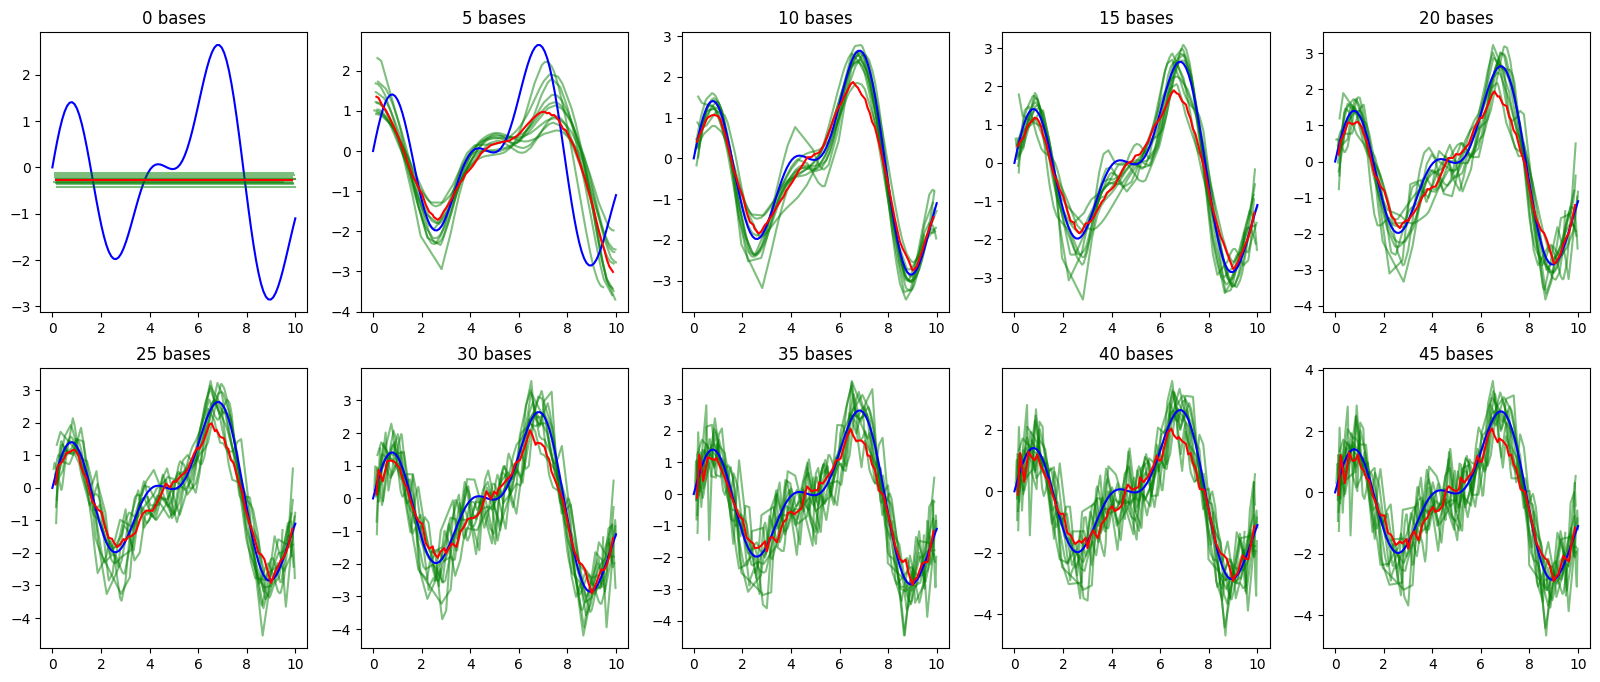

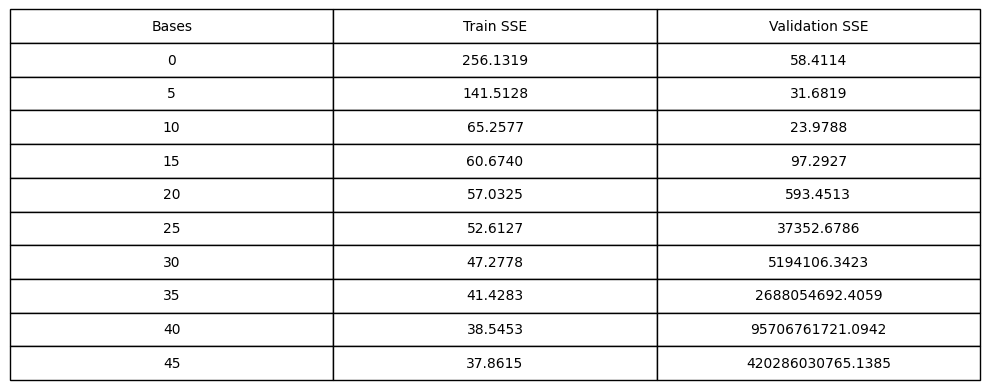

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(42)#set seed for reproducibility
#get our sample data

def get_bases(D,x):
    '''retuns numpy.ndarray of D Gaussian bases'''
    gaussian = lambda x, mu, sigma: np.exp(-((x-mu)/sigma)**2)
    mu = []
    for d in range(D):
        mu.append(np.min(x) + (np.max(x)-np.min(x))/(D-1) * d)
    mu = np.array(mu)
    phi = gaussian(x[:,None], mu[None,:],1)
    return phi

class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self,x,y):
        if x.ndim == 1:
            x = x[:,None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        self.w = np.linalg.lstsq(x,y)[0]
        return self

    def predict(self,x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

#Cost Function for prediction
def sse(y_predict, y_validation):
    sse = 0
    for i in range(len(y_predict)):
        sse += (y_predict[i] - y_validation[i])**2

    return sse

epsilon = np.random.normal(0,1,100)
f_clean = lambda x : np.log(x+1) * np.cos(x) + np.sin(2*x)
f_noise = lambda x : np.log(x+1) * np.cos(x) + np.sin(2*x) + epsilon
x_uniform = np.linspace(0,10,100)
true_y = f_clean(x_uniform)

#to hold the data for the 10 samplings
x = []
y_clean = []
y_noise = []
X_train = []
X_test = []
Y_train = []
Y_test = []

#to hold sse results
sses_train = [[],[],[],[],[],[],[],[],[],[]] #array to hold the sse of train set of each model
sses_validation = [[],[],[],[],[],[],[],[],[],[]] #array to hold the sse of validation set of each model

#sample data 10 times
for t in range(10):
    x_local = np.random.rand(100) * 10

    y_clean_local = f_clean(x_local)
    y_noise_local = f_noise(x_local)

    #Split Data 80/20
    X_train_local = x_local[:80]
    X_test_local = x_local[80:]
    Y_train_local = y_noise_local[:80]
    Y_test_local = y_noise_local[80:]
    #sort for better visualization
    #sort test splits
    sorted_train = np.argsort(X_train_local)
    sorted_test = np.argsort(X_test_local)
    X_train.append(X_train_local[sorted_train])
    X_test.append(X_test_local[sorted_test])
    Y_train.append(Y_train_local[sorted_train])
    Y_test.append(Y_test_local[sorted_test])

    sorted_indices = np.argsort(x_local)
    x.append(x_local[sorted_indices])
    y_clean.append(y_clean_local[sorted_indices])
    y_noise.append(y_noise_local[sorted_indices])

#get average x
average_x  = []
for t in range(len(X_train[0])):
    xi = []
    for q in range(len(X_train)):
        xi.append(X_train[q][t])
    average_x.append(np.mean(xi))

#start plotting 10 models
fig = plt.figure(figsize=(20, 8))
#plot 0 bases
fits = []
phi_train = np.empty((len(X_train[0]), 0))
phi_test = np.empty((len(X_test[0]), 0))
plt.subplot(2, 5, 1)
plt.plot(x_uniform, true_y, '-b')
for t in range(10):
    plt.title('0 bases')
    #Fit and Predict empty feature matrix since zero bases
    model = LinearRegression().fit(phi_train,Y_train[t])
    yh_train = model.predict(phi_train)
    fits.append(yh_train)
    plt.plot(X_train[t], yh_train, '-g', alpha=.5)
    #plot the true function
    #compute sse for the model
    sses_train[0].append(sse(yh_train, Y_train[t]))
    yh_validation = model.predict(phi_test)
    sses_validation[0].append(sse(yh_validation, Y_test[t]))

#plot average
plt.plot(average_x, np.mean(fits,axis=0), '-r')

#plot the 9 remaining models
for t in range(9):
    plt.subplot(2, 5, t+2)
    plt.title(f'{(t+1) * 5} bases')
    fits = []
    for q in range(10):
        phi = get_bases((t+1)*5,X_train[q])
        phi_test = get_bases((t+1)*5,X_test[q])
        model = LinearRegression().fit(phi,Y_train[q])
        yh_train = model.predict(phi)
        fits.append(yh_train)
        plt.plot(X_train[q], yh_train, '-g', alpha=.5)
        #plot the true function
        #compute sse for the model
        sses_train[t+1].append(sse(yh_train, Y_train[q]))
        yh_validation = model.predict(phi_test)
        sses_validation[t+1].append(sse(yh_validation, Y_test[q]))
    #plot ground truth
    plt.plot(x_uniform, true_y, '-b')

    #plot average fit
    plt.plot(average_x,np.mean(fits, axis=0), '-r')


plt.show()

#make table with sse results
basis_counts = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')

#Prepare table data
table_data = [['Bases', 'Train SSE', 'Validation SSE']]
for i, d in enumerate(basis_counts):
    table_data.append([str(d), f'{np.mean(sses_train[i]):.4f}', f'{np.mean(sses_validation[i]):.4f}'])

#Create table
table = ax.table(cellText=table_data, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)  # Scale height of cells
plt.tight_layout()
plt.show()

**Task 3 Lasso Regression**

[Lasso] Best lambda (by CV): 0.0027826


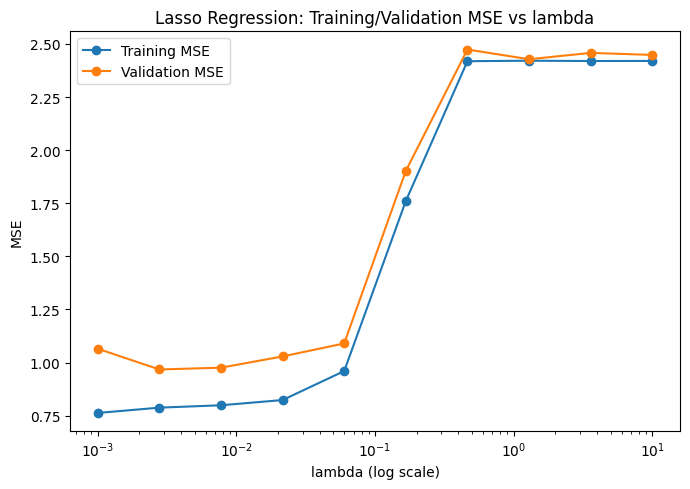

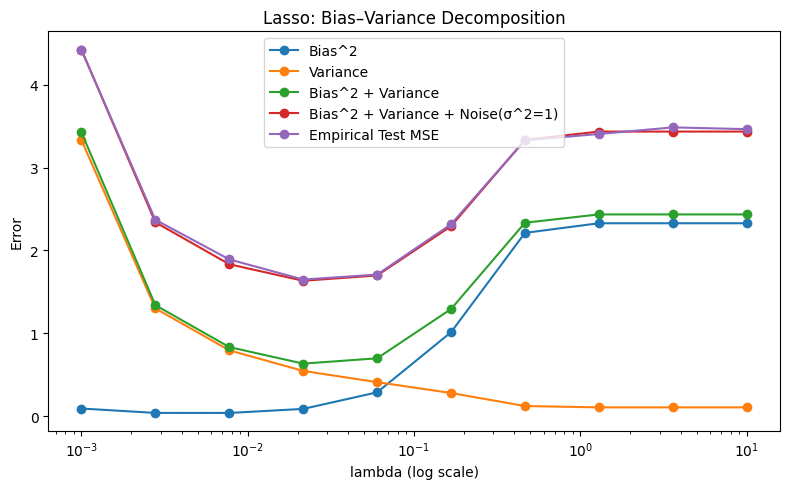

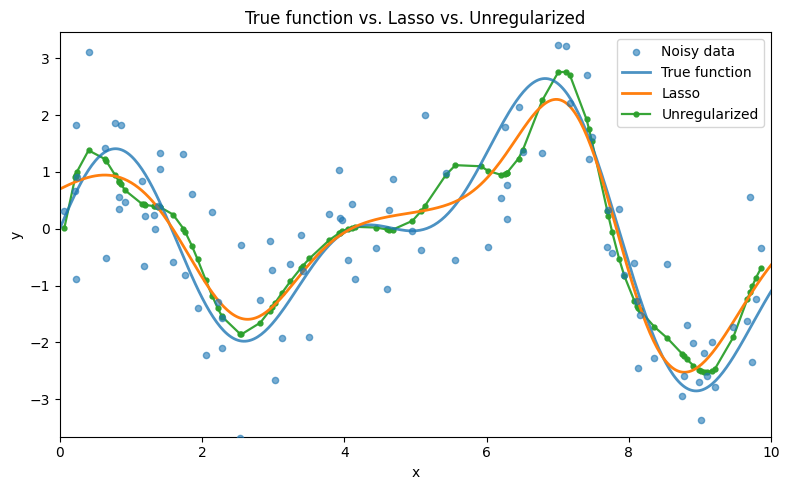

In [8]:
# Task 3 — Lasso (L1)
import numpy as np
import matplotlib.pyplot as plt


# True function and data

def f_true(x):
    x = np.asarray(x)
    return np.log(x + 1) * np.cos(x) + np.sin(2 * x)

def sample_dataset(N=100, xmin=0.0, xmax=10.0, noise_std=1.0, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    x = rng.uniform(xmin, xmax, size=N)
    y = f_true(x) + rng.normal(0.0, noise_std, size=N)
    return x, y


# Gaussian basis (D=45)

def gaussian_centers(D=45, xmin=0.0, xmax=10.0):
    return np.linspace(xmin, xmax, D)

def gaussian_basis(x, centers, sigma=1.0, include_bias=True):
    x = np.asarray(x).reshape(-1, 1)
    mu = np.asarray(centers).reshape(1, -1)
    Phi = np.exp(-((x - mu) ** 2) / (sigma ** 2))
    if include_bias:
        Phi = np.column_stack([Phi, np.ones(Phi.shape[0])])
    return Phi


# Cross-validation

def cross_validate(n, n_folds=10, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    n_val = n // n_folds
    inds = rng.permutation(n)

    for f in range(n_folds):
        start = f * n_val
        stop = (f + 1) * n_val if f < n_folds - 1 else n
        val_inds = list(inds[start:stop])
        tr_inds = list(np.concatenate([inds[:start], inds[stop:]]))
        yield tr_inds, val_inds


# Error

def mse(y_true, y_pred):
    return np.mean((np.asarray(y_true) - np.asarray(y_pred)) ** 2)

def _soft_threshold(z, gamma):
    return np.sign(z) * np.maximum(np.abs(z) - gamma, 0.0)


# Lasso

class LassoRegressor:

    def __init__(self, lambda_=0.0, penalize_bias=False, max_iter=500, tol=1e-4):
        self.lambda_ = float(lambda_)
        self.penalize_bias = penalize_bias
        self.max_iter = int(max_iter)
        self.tol = float(tol)
        self.w = None

    def fit(self, Phi, y):
        Phi = np.asarray(Phi, float)
        y = np.asarray(y, float).reshape(-1)
        N, D = Phi.shape
        w = np.zeros(D)
        bias_idx = D - 1
        aj = (Phi ** 2).sum(axis=0) / N

        for _ in range(self.max_iter):
            w_old = w.copy()

            for j in range(D):
                r = y - (Phi @ w) + w[j] * Phi[:, j]
                cj = (Phi[:, j] * r).sum() / N

                if (not self.penalize_bias) and (j == bias_idx):
                    w[j] = cj / (aj[j] + 1e-12)
                else:
                    w[j] = _soft_threshold(cj, self.lambda_) / (aj[j] + 1e-12)

            if np.linalg.norm(w - w_old, ord=np.inf) < self.tol:
                break

        self.w = w
        return self

    def predict(self, Phi):
        return np.asarray(Phi, float) @ self.w


# Configuration

rng = np.random.default_rng(1337)
D = 45
sigma = 1.0
N_total = 100
n_folds = 10
lambda_grid = np.logspace(-3, 1, 10)
penalize_bias = False


# Data

x, y = sample_dataset(N=N_total, rng=rng)
centers = gaussian_centers(D, 0.0, 10.0)
Phi = gaussian_basis(x, centers, sigma, include_bias=True)


# 10-fold cross-validation across lambda

train_mse = []
val_mse = []

for lam in lambda_grid:
    fold_train = []
    fold_val = []
    for tr_idx, va_idx in cross_validate(len(x), n_folds=n_folds, rng=rng):
        Phi_tr, y_tr = Phi[tr_idx], y[tr_idx]
        Phi_va, y_va = Phi[va_idx], y[va_idx]

        model = LassoRegressor(lambda_=lam, penalize_bias=penalize_bias).fit(Phi_tr, y_tr)
        yhat_tr = model.predict(Phi_tr)
        yhat_va = model.predict(Phi_va)

        fold_train.append(mse(y_tr, yhat_tr))
        fold_val.append(mse(y_va, yhat_va))

    train_mse.append(np.mean(fold_train))
    val_mse.append(np.mean(fold_val))

best_idx = int(np.argmin(val_mse))
best_lambda = float(lambda_grid[best_idx])
print(f"[Lasso] Best lambda (by CV): {best_lambda:.5g}")


# Training/Validation MSE vs lambda

plt.figure(figsize=(7,5))
plt.plot(lambda_grid, train_mse, marker='o', label='Training MSE')
plt.plot(lambda_grid, val_mse, marker='o', label='Validation MSE')
plt.xscale('log')
plt.xlabel('lambda (log scale)')
plt.ylabel('MSE')
plt.title('Lasso Regression: Training/Validation MSE vs lambda')
plt.legend()
plt.tight_layout()
plt.show()


# Bias–Variance Decomposition

num_datasets = 50
N_per_dataset = 20
x_test = np.linspace(0, 10, 200)
Phi_test = gaussian_basis(x_test, centers, sigma, include_bias=True)
f_test = f_true(x_test)
noise_var = 1.0

predictions = np.zeros((num_datasets, len(lambda_grid), len(x_test)))

for d in range(num_datasets):
    xd, yd = sample_dataset(N=N_per_dataset, rng=rng)
    Phid = gaussian_basis(xd, centers, sigma, include_bias=True)

    for i, lam in enumerate(lambda_grid):
        model = LassoRegressor(lambda_=lam, penalize_bias=penalize_bias).fit(Phid, yd)
        predictions[d, i, :] = model.predict(Phi_test)

mean_pred = predictions.mean(axis=0)
var_pred  = predictions.var(axis=0)
bias2     = (mean_pred - f_test[None, :])**2

bias2_curve = bias2.mean(axis=1)
var_curve   = var_pred.mean(axis=1)
bv_curve    = bias2_curve + var_curve
bvn_curve   = bv_curve + noise_var

# Empirical test MSE
test_mse = []
for i in range(len(lambda_grid)):
    mse_i = 0.0
    for d in range(num_datasets):
        y_test_noisy = f_test + rng.normal(0.0, np.sqrt(noise_var), size=len(x_test))
        mse_i += mse(y_test_noisy, predictions[d, i, :])
    test_mse.append(mse_i / num_datasets)
test_mse = np.array(test_mse)


# Bias–Variance vs lambda

plt.figure(figsize=(8,5))
plt.plot(lambda_grid, bias2_curve, marker='o', label='Bias^2')
plt.plot(lambda_grid, var_curve, marker='o', label='Variance')
plt.plot(lambda_grid, bv_curve, marker='o', label='Bias^2 + Variance')
plt.plot(lambda_grid, bvn_curve, marker='o', label='Bias^2 + Variance + Noise(σ^2=1)')
plt.plot(lambda_grid, test_mse, marker='o', label='Empirical Test MSE')
plt.xscale('log')
plt.xlabel('lambda (log scale)')
plt.ylabel('Error')
plt.title('Lasso: Bias–Variance Decomposition')
plt.legend()
plt.tight_layout()
plt.show()






# Lambda=0 vs Lasso Regression

# Fitting full-data models
lasso_unreg = LassoRegressor(lambda_=0.0, penalize_bias=penalize_bias,
                             max_iter=20000, tol=1e-10).fit(Phi, y)
lasso_best  = LassoRegressor(lambda_=best_lambda, penalize_bias=penalize_bias).fit(Phi, y)

plt.figure(figsize=(8,5))

# Grid for true function and Lasso
x_grid   = np.linspace(0, 10, 400)
Phi_grid = gaussian_basis(x_grid, centers, sigma, include_bias=True)
y_true_grid  = f_true(x_grid)
y_lasso_grid = lasso_best.predict(Phi_grid)

# Unregularized predictions
order         = np.argsort(x)
x_train_line  = x[order]
y_unreg_line  = lasso_unreg.predict(Phi)[order]


y_for_limits = np.concatenate([y, y_lasso_grid, y_true_grid])
q1, q2 = np.percentile(y_for_limits, [1, 99])
yr = q2 - q1
ymin, ymax = q1 - 0.15*yr, q2 + 0.15*yr

# Plot
plt.scatter(x, y, s=20, alpha=0.6, label='Noisy data', zorder=3)
plt.plot(x_grid, y_true_grid, lw=2, alpha=0.8, label='True function', zorder=2)
plt.plot(x_grid, y_lasso_grid, lw=2, label='Lasso', zorder=2)
plt.plot(x_train_line, y_unreg_line, '-o', lw=1.6, ms=3.5, alpha=0.95,
         label='Unregularized', zorder=1)

plt.title('True function vs. Lasso vs. Unregularized')
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(0, 10)
plt.ylim(ymin, ymax)
plt.legend()
plt.tight_layout()
plt.show()

**Task 3 Ridge Regression**

[Ridge] Best lambda (by CV): 0.0027826


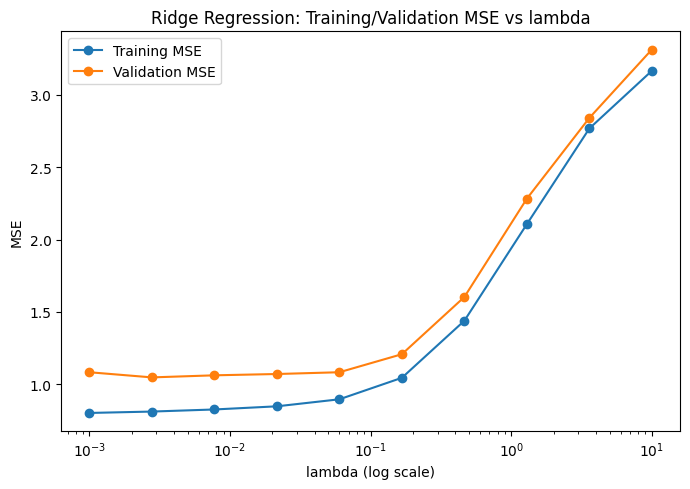

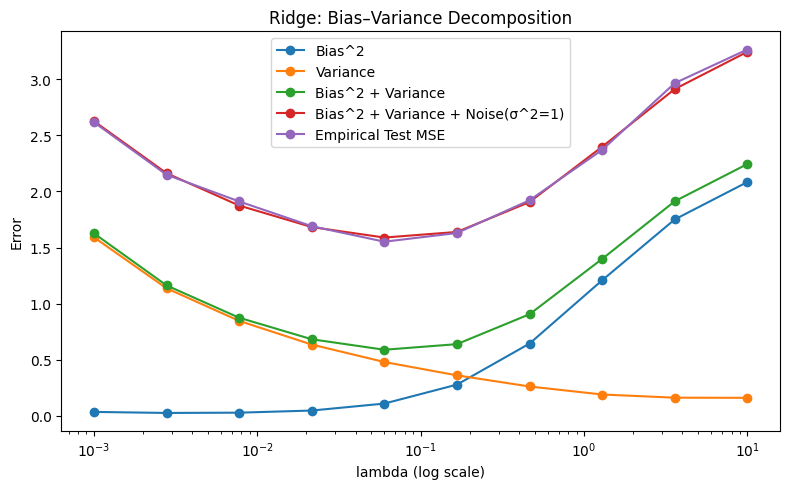

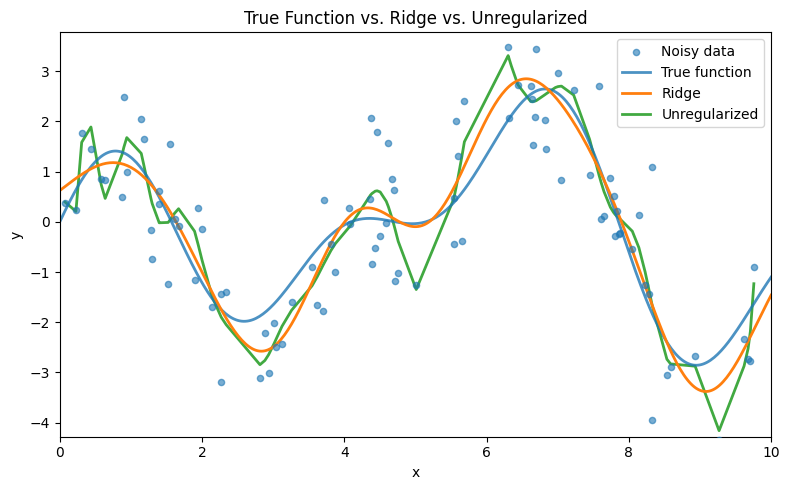

In [4]:
# Task 3 — Ridge (L2)
import numpy as np
import matplotlib.pyplot as plt


# True function and data

def f_true(x):
    x = np.asarray(x)
    return np.log(x + 1) * np.cos(x) + np.sin(2 * x)

def sample_dataset(N=100, xmin=0.0, xmax=10.0, noise_std=1.0, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    x = rng.uniform(xmin, xmax, size=N)
    y = f_true(x) + rng.normal(0.0, noise_std, size=N)
    return x, y


# Gaussian basis (D=45)

def gaussian_centers(D=45, xmin=0.0, xmax=10.0):
    return np.linspace(xmin, xmax, D)

def gaussian_basis(x, centers, sigma=1.0, include_bias=True):
    x = np.asarray(x).reshape(-1, 1)
    mu = np.asarray(centers).reshape(1, -1)
    Phi = np.exp(-((x - mu) ** 2) / (sigma ** 2))
    if include_bias:
        Phi = np.column_stack([Phi, np.ones(Phi.shape[0])])
    return Phi


# Cross-validation

def cross_validate(n, n_folds=10, rng=None):

    rng = np.random.default_rng() if rng is None else rng
    n_val = n // n_folds
    inds = rng.permutation(n)

    for f in range(n_folds):
        start = f * n_val
        stop = (f + 1) * n_val if f < n_folds - 1 else n
        val_inds = list(inds[start:stop])
        tr_inds = list(np.concatenate([inds[:start], inds[stop:]]))
        yield tr_inds, val_inds


# Error

def mse(y_true, y_pred):
    return np.mean((np.asarray(y_true) - np.asarray(y_pred)) ** 2)


# Ridge Regression

class RidgeRegressor:
    def __init__(self, lambda_=0.0, penalize_bias=False):
        self.lambda_ = float(lambda_)
        self.penalize_bias = penalize_bias
        self.w = None

    def fit(self, Phi, y):
        Phi = np.asarray(Phi, float)
        y = np.asarray(y, float).reshape(-1)
        N, D = Phi.shape
        R = np.eye(D)
        if not self.penalize_bias:
            R[-1, -1] = 0.0  # to not penalize the bias
        A = Phi.T @ Phi + (N * self.lambda_) * R
        b = Phi.T @ y
        self.w = np.linalg.solve(A, b)
        return self

    def predict(self, Phi):
        return np.asarray(Phi, float) @ self.w


# Configuration

rng = np.random.default_rng(42)
D = 45
sigma = 1.0
N_total = 100
n_folds = 10
lambda_grid = np.logspace(-3, 1, 10)  # 10 values between 10^-3 and 10
penalize_bias = False


# Data

x, y = sample_dataset(N=N_total, rng=rng)
centers = gaussian_centers(D, 0.0, 10.0)
Phi = gaussian_basis(x, centers, sigma, include_bias=True)


# 10-fold cross-validation across lambda

train_mse = []
val_mse = []

for lam in lambda_grid:
    fold_train = []
    fold_val = []
    for tr_idx, va_idx in cross_validate(len(x), n_folds=n_folds, rng=rng):
        Phi_tr, y_tr = Phi[tr_idx], y[tr_idx]
        Phi_va, y_va = Phi[va_idx], y[va_idx]

        model = RidgeRegressor(lambda_=lam, penalize_bias=penalize_bias).fit(Phi_tr, y_tr)
        yhat_tr = model.predict(Phi_tr)
        yhat_va = model.predict(Phi_va)

        fold_train.append(mse(y_tr, yhat_tr))
        fold_val.append(mse(y_va, yhat_va))

    train_mse.append(np.mean(fold_train))
    val_mse.append(np.mean(fold_val))

best_idx = int(np.argmin(val_mse))
best_lambda = float(lambda_grid[best_idx])
print(f"[Ridge] Best lambda (by CV): {best_lambda:.5g}")


# Training/Validation MSE vs lambda

plt.figure(figsize=(7,5))
plt.plot(lambda_grid, train_mse, marker='o', label='Training MSE')
plt.plot(lambda_grid, val_mse, marker='o', label='Validation MSE')
plt.xscale('log')
plt.xlabel('lambda (log scale)')
plt.ylabel('MSE')
plt.title('Ridge Regression: Training/Validation MSE vs lambda')
plt.legend()
plt.tight_layout()
plt.show()


# Bias–Variance Decomposition

num_datasets = 50
N_per_dataset = 20
x_test = np.linspace(0, 10, 200)
Phi_test = gaussian_basis(x_test, centers, sigma, include_bias=True)
f_test = f_true(x_test)
noise_var = 1.0

# predictions[d, i, j]  -> dataset d, lambda i, test point j
predictions = np.zeros((num_datasets, len(lambda_grid), len(x_test)))

for d in range(num_datasets):
    xd, yd = sample_dataset(N=N_per_dataset, rng=rng)
    Phid = gaussian_basis(xd, centers, sigma, include_bias=True)

    for i, lam in enumerate(lambda_grid):
        model = RidgeRegressor(lambda_=lam, penalize_bias=penalize_bias).fit(Phid, yd)
        predictions[d, i, :] = model.predict(Phi_test)

# Bias^2, variance, test MSE
mean_pred = predictions.mean(axis=0)
var_pred  = predictions.var(axis=0)
bias2     = (mean_pred - f_test[None, :])**2

bias2_curve = bias2.mean(axis=1)
var_curve   = var_pred.mean(axis=1)
bv_curve    = bias2_curve + var_curve
bvn_curve   = bv_curve + noise_var

# Empirical test MSE average over datasets of MSE against noise targets

test_mse = []
for i in range(len(lambda_grid)):
    mse_i = 0.0
    for d in range(num_datasets):
        y_test_noisy = f_test + rng.normal(0.0, np.sqrt(noise_var), size=len(x_test))
        mse_i += mse(y_test_noisy, predictions[d, i, :])
    test_mse.append(mse_i / num_datasets)
test_mse = np.array(test_mse)


# Bias–Variance vs lambda

plt.figure(figsize=(8,5))
plt.plot(lambda_grid, bias2_curve, marker='o', label='Bias^2')
plt.plot(lambda_grid, var_curve, marker='o', label='Variance')
plt.plot(lambda_grid, bv_curve, marker='o', label='Bias^2 + Variance')
plt.plot(lambda_grid, bvn_curve, marker='o', label='Bias^2 + Variance + Noise(σ^2=1)')
plt.plot(lambda_grid, test_mse, marker='o', label='Empirical Test MSE')
plt.xscale('log')
plt.xlabel('lambda (log scale)')
plt.ylabel('Error')
plt.title('Ridge: Bias–Variance Decomposition')
plt.legend()
plt.tight_layout()
plt.show()





# lambda=0 vs Ridge Regression

#fitting full-data models
ridge_unreg = RidgeRegressor(lambda_=0.0, penalize_bias=penalize_bias).fit(Phi, y)
ridge_best = RidgeRegressor(lambda_=best_lambda, penalize_bias=penalize_bias).fit(Phi, y)

plt.figure(figsize=(8,5))

# Grid for ridge + true function
x_grid = np.linspace(0, 10, 400)
Phi_grid = gaussian_basis(x_grid, centers, sigma, include_bias=True)
y_true_grid = f_true(x_grid)
y_ridge_grid = ridge_best.predict(Phi_grid)

# Predictions
y_unreg_tr = ridge_unreg.predict(Phi)
order = np.argsort(x)
x_line       = x[order]
y_unreg_line = y_unreg_tr[order]


y_for_limits = np.concatenate([y, y_ridge_grid, y_true_grid])
q1, q2 = np.percentile(y_for_limits, [1, 99])
yr = q2 - q1
ymin, ymax = q1 - 0.15*yr, q2 + 0.15*yr

# Plot
plt.scatter(x, y, s=20, alpha=0.6, label='Noisy data', zorder=3)
plt.plot(x_grid, y_true_grid, lw=2, alpha=0.8, label='True function', zorder=2)
plt.plot(x_grid, y_ridge_grid, lw=2, label='Ridge', zorder=2)
plt.plot(x_line, y_unreg_line, lw=2, alpha=0.9, label='Unregularized', zorder=1)

plt.title('True Function vs. Ridge vs. Unregularized')
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(0, 10)
plt.ylim(ymin, ymax)
plt.legend()
plt.tight_layout()
plt.show()

**Task 4**

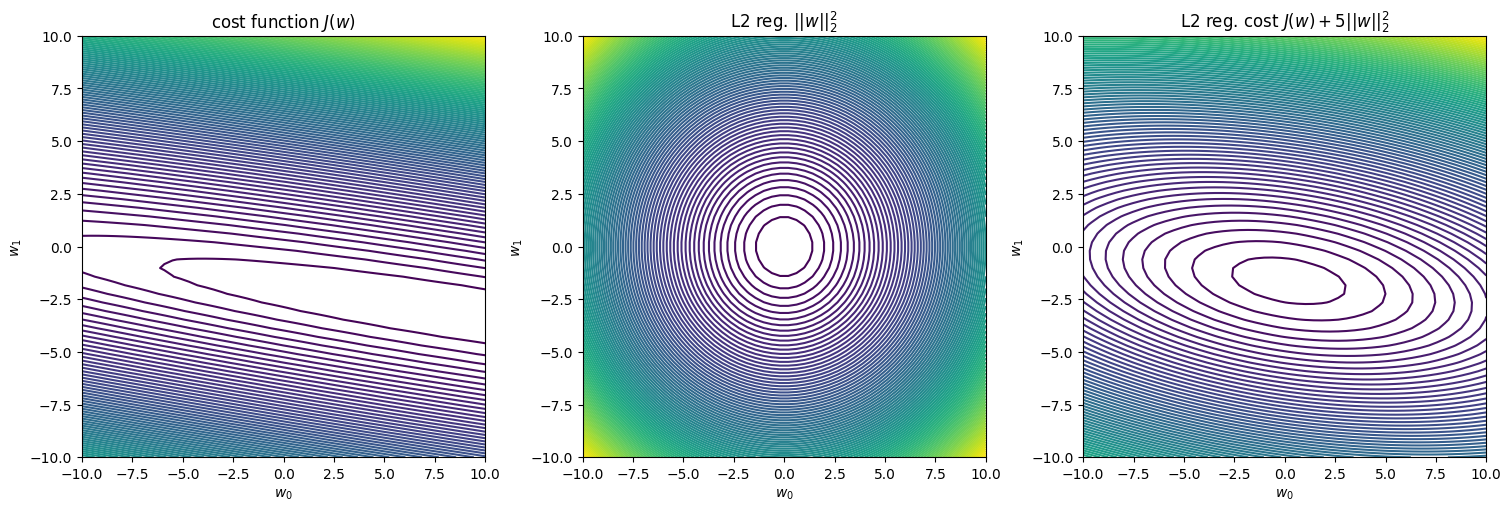

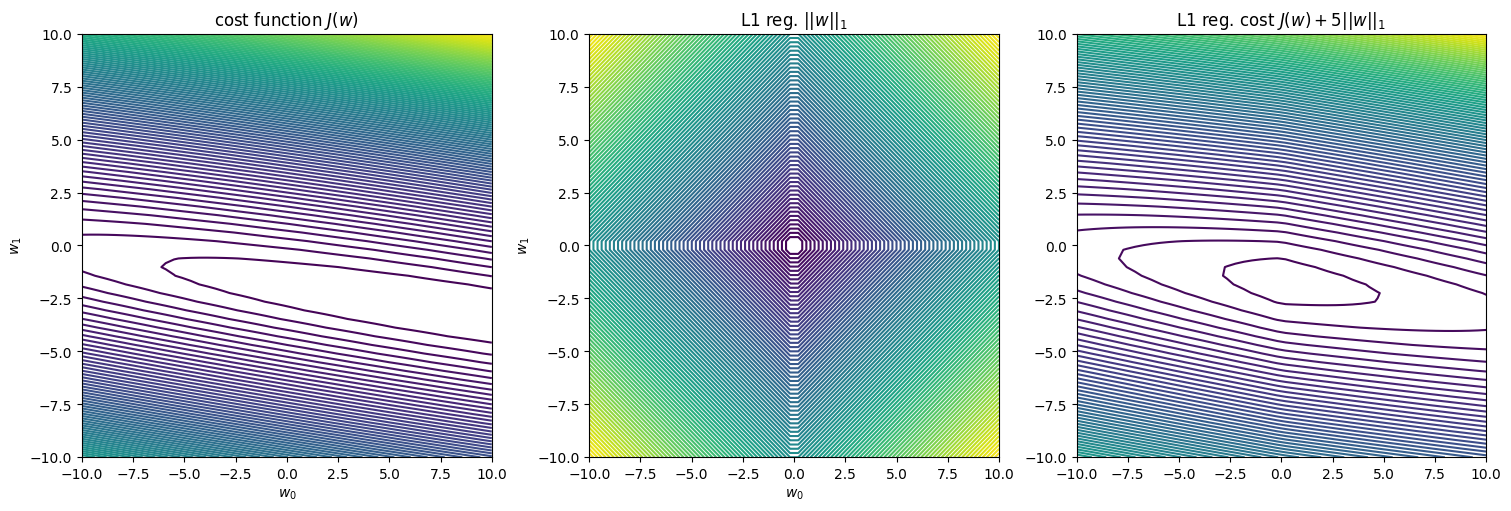

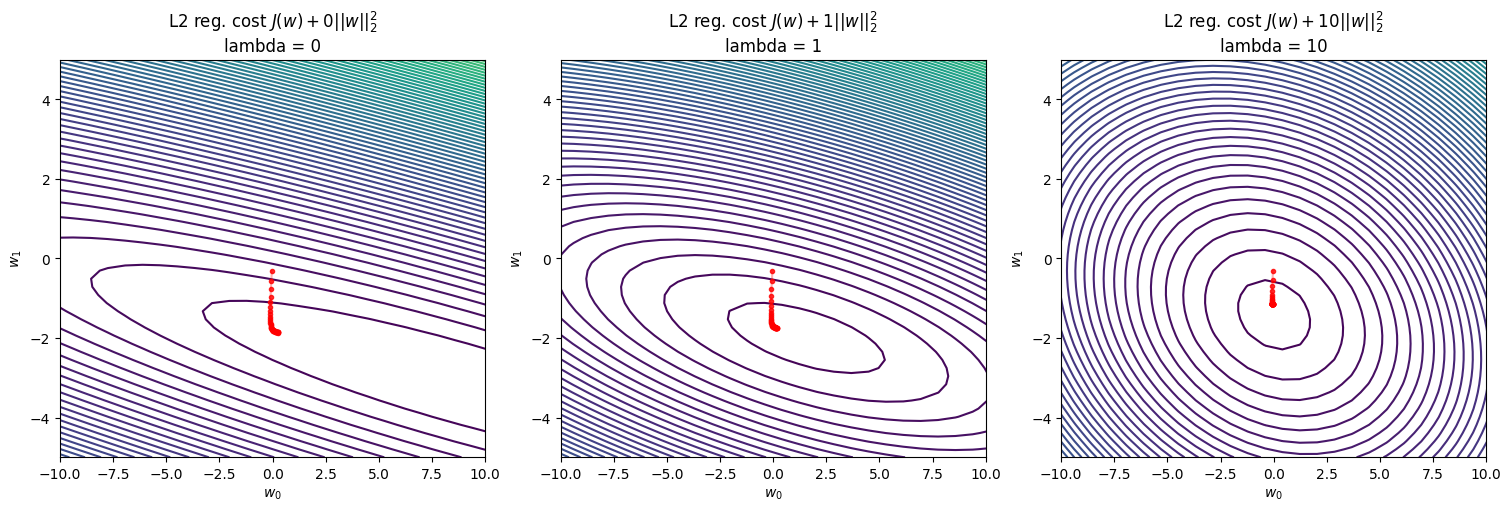

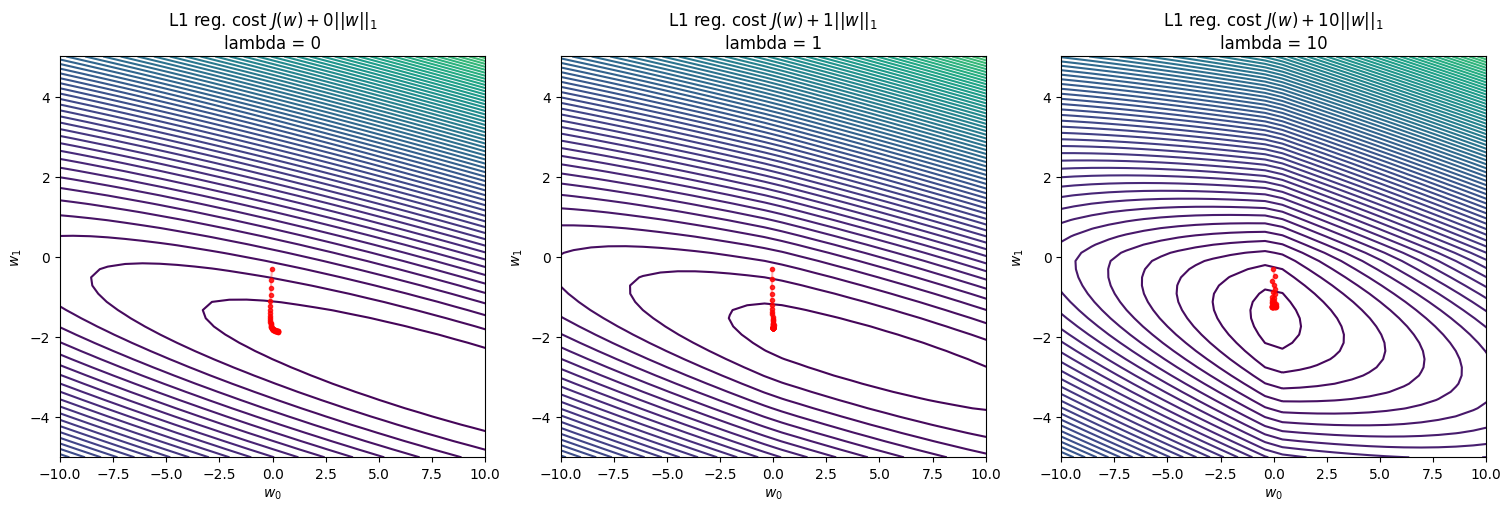

In [5]:
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
import itertools

class GradientDescent:
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []

    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)
            w = w - self.learning_rate * grad
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

class LinearRegression:
    def __init__(self, add_bias=True, add_l2= False, add_l1 =False, reg_coeff=0):
        self.add_bias = add_bias
        self.add_l2 = add_l2
        self.add_l1 = add_l1
        self.reg_coeff = reg_coeff
        pass

    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def gradient(x, y, w):
            yh =  x @ w
            N, D = x.shape
            grad = .5*np.dot(yh - y, x)/N
            if self.add_l1:                                 #add L1 regularization
                grad += self.reg_coeff*np.sign(w)
            if self.add_l2:                                 #add L2 regularization
                grad += self.reg_coeff* w
            return grad
        w0 = np.zeros(D)
        self.w = optimizer.run(gradient, x, y, w0)
        return self

    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

#generate synthetic data:
#30 data points
N = 30
#30 x values uniformly distributed between 1 and 10
x = np.linspace(0, 10, N)
#y = -3x + 8 +2E with E normally distributed with mean 0 and var 1
y = -3*x + 8 + 2*np.random.randn(N)

#linear cost function
cost = lambda w: .5*np.mean((w[0] + w[1]*x - y)**2)
#penalty functions for L1 and L2 regularization
l2_penalty = lambda w: np.dot(w,w)/2
l1_penalty = lambda w: np.sum(np.abs(w))

#regularization coefficients to plot
reg_list_l2 = [0, 1, 10]
reg_list_l1 = [0, 1, 10]


#cost contours for L2
fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(15, 5))
plot_contour(cost, [-10,10], [-10,10], 50, axes[0])
axes[0].set_title(r'cost function $J(w)$')
plot_contour(l2_penalty, [-10,10], [-10,10], 50, axes[1])
axes[1].set_title(r'L2 reg. $||w||_2^2$')
cost_plus_l2 = lambda w: cost(w) + 5*l2_penalty(w)
plot_contour(cost_plus_l2, [-10,10], [-10,10], 50, axes[2])
axes[2].set_title(r'L2 reg. cost $J(w) + 5 ||w||_2^2$')
axes[0].set_xlabel(r'$w_0$')
axes[0].set_ylabel(r'$w_1$')
axes[1].set_xlabel(r'$w_0$')
axes[1].set_ylabel(r'$w_1$')
axes[2].set_xlabel(r'$w_0$')
axes[2].set_ylabel(r'$w_1$')
plt.show()

#cost contours for L1
fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(15, 5))
plot_contour(cost, [-10,10], [-10,10], 50, axes[0])
axes[0].set_title(r'cost function $J(w)$')
plot_contour(l1_penalty, [-10,10], [-10,10], 50, axes[1])
axes[1].set_title(r'L1 reg. $||w||_1$')
cost_plus_l1 = lambda w: cost(w) + 5*l1_penalty(w)
plot_contour(cost_plus_l1, [-10,10], [-10,10], 50, axes[2])
axes[2].set_title(r'L1 reg. cost $J(w) + 5 ||w||_1$')
axes[0].set_xlabel(r'$w_0$')
axes[0].set_ylabel(r'$w_1$')
axes[1].set_xlabel(r'$w_0$')
axes[1].set_ylabel(r'$w_1$')
plt.show()

#cost functions with regularization
cost_plus_l2 = lambda w, reg: cost(w) + reg*l2_penalty(w)
cost_plus_l1 = lambda w, reg: cost(w) + reg*l1_penalty(w)

#plot of cost function vs. regularization for L2 (contours of loss w trajectory of optimizer)
fig, axes = plt.subplots(ncols=len(reg_list_l2), nrows=1, constrained_layout=True, figsize=(15, 5))
for i, reg_coef in enumerate(reg_list_l2):
    optimizer = GradientDescent(learning_rate=.01, max_iters=50, record_history=True)
    model = LinearRegression(optimizer, add_l2=True, reg_coeff=reg_coef)
    model.fit(x,y, optimizer)
    current_cost = lambda w: cost_plus_l2(w, reg_coef)
    plot_contour(current_cost, [-20,20], [-5,5], 50, axes[i])
    w_hist = np.vstack(optimizer.w_history)# T x 2
    axes[i].plot(w_hist[:,1], w_hist[:,0], '.r', alpha=.8)
    axes[i].plot(w_hist[:,1], w_hist[:,0], '-r', alpha=.3)
    axes[i].set_xlabel(r'$w_0$')
    axes[i].set_ylabel(r'$w_1$')
    axes[i].set_title(f'L2 reg. cost $J(w) + {reg_coef}'+ r'||w||_2^2$'+'\n'+ f'lambda = {reg_coef}')
    axes[i].set_xlim([-10,10])
    axes[i].set_ylim([-5,5])
plt.show()

#plot of cost function vs. regularization for L1 (contours of loss w trajectory of optimizer)
fig, axes = plt.subplots(ncols=len(reg_list_l1), nrows=1, constrained_layout=True, figsize=(15, 5))
for i, reg_coef in enumerate(reg_list_l1):
    optimizer = GradientDescent(learning_rate=.01, max_iters=50, record_history=True)
    model = LinearRegression(optimizer, add_l1=True, reg_coeff=reg_coef)
    model.fit(x,y, optimizer)
    current_cost = lambda w: cost_plus_l1(w, reg_coef)
    plot_contour(current_cost, [-20,20], [-5,5], 50, axes[i])
    w_hist = np.vstack(optimizer.w_history)# T x 2
    axes[i].plot(w_hist[:,1], w_hist[:,0], '.r', alpha=.8)
    axes[i].plot(w_hist[:,1], w_hist[:,0], '-r', alpha=.3)
    axes[i].set_xlabel(r'$w_0$')
    axes[i].set_ylabel(r'$w_1$')
    axes[i].set_title(f'L1 reg. cost $J(w) + {reg_coef}'+ r'||w||_1$'+'\n'+ f'lambda = {reg_coef}')
    axes[i].set_xlim([-10,10])
    axes[i].set_ylim([-5,5])
plt.show()

**Bias-Variance Tradeoff With Varying Levels of Noise**

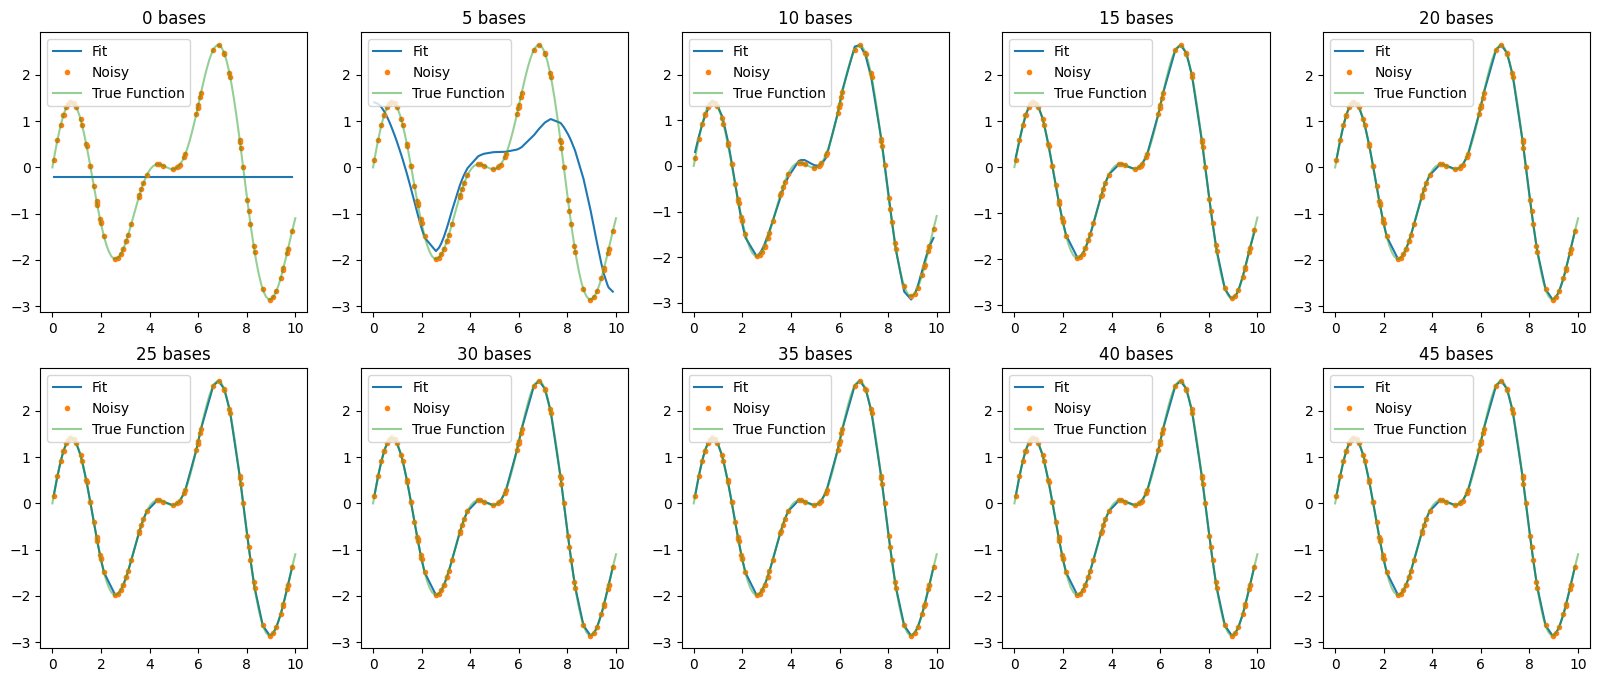

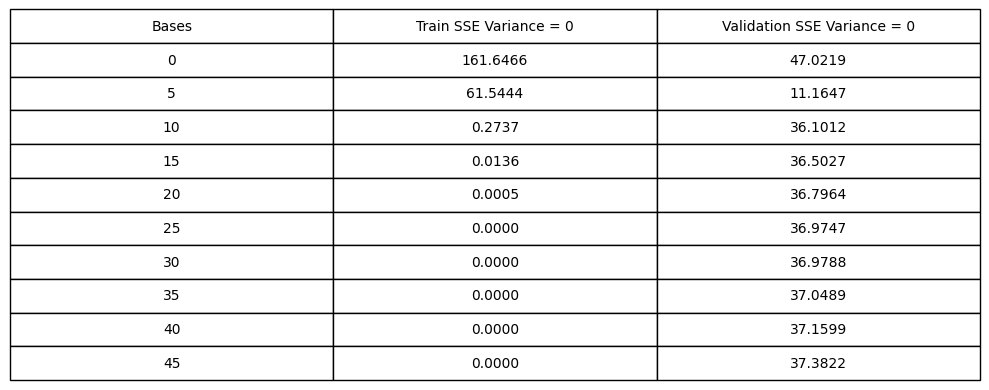

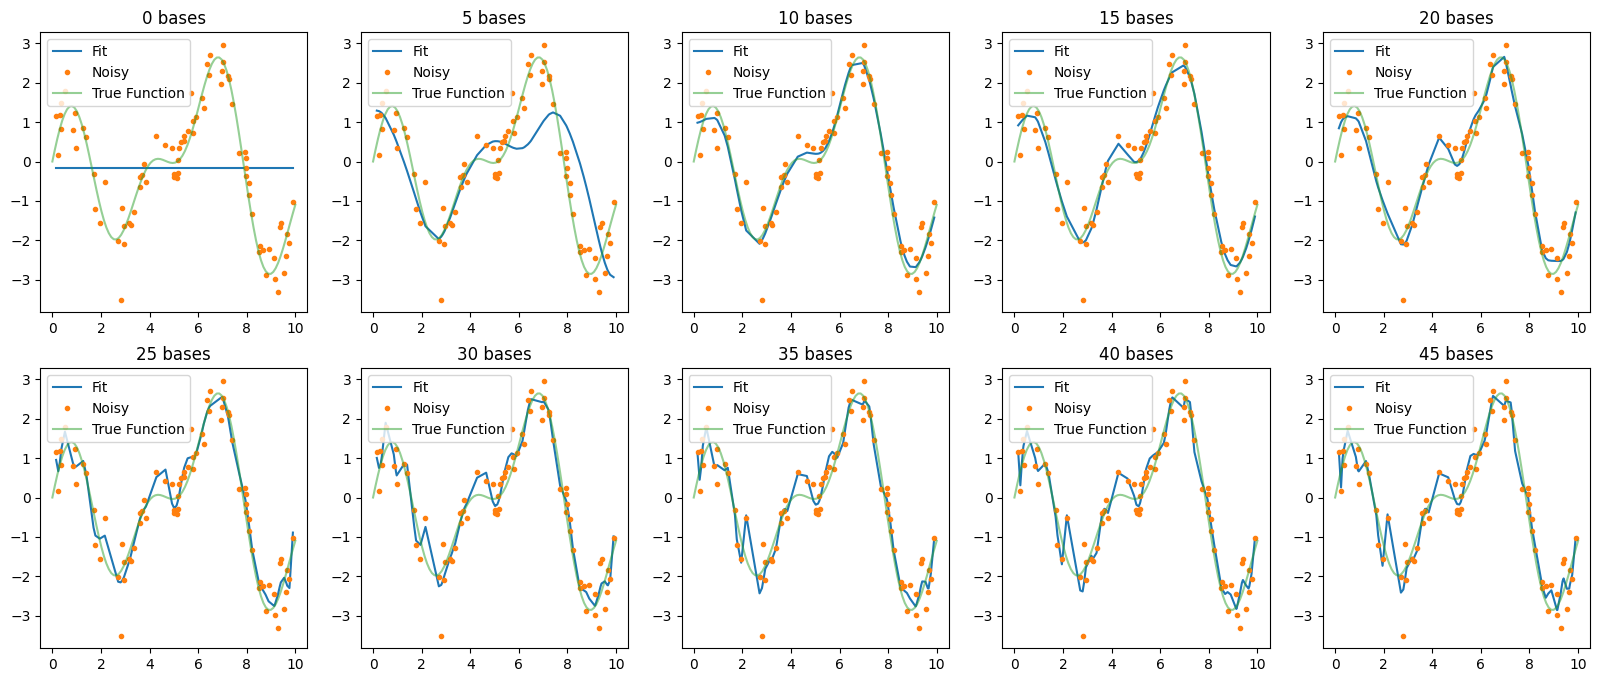

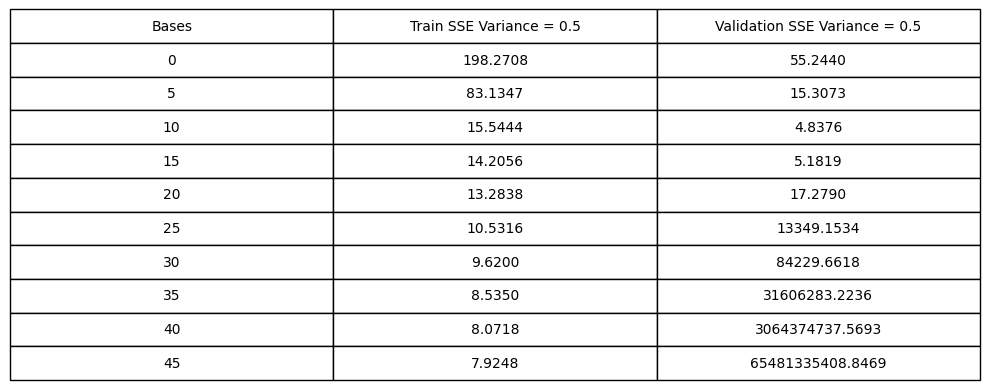

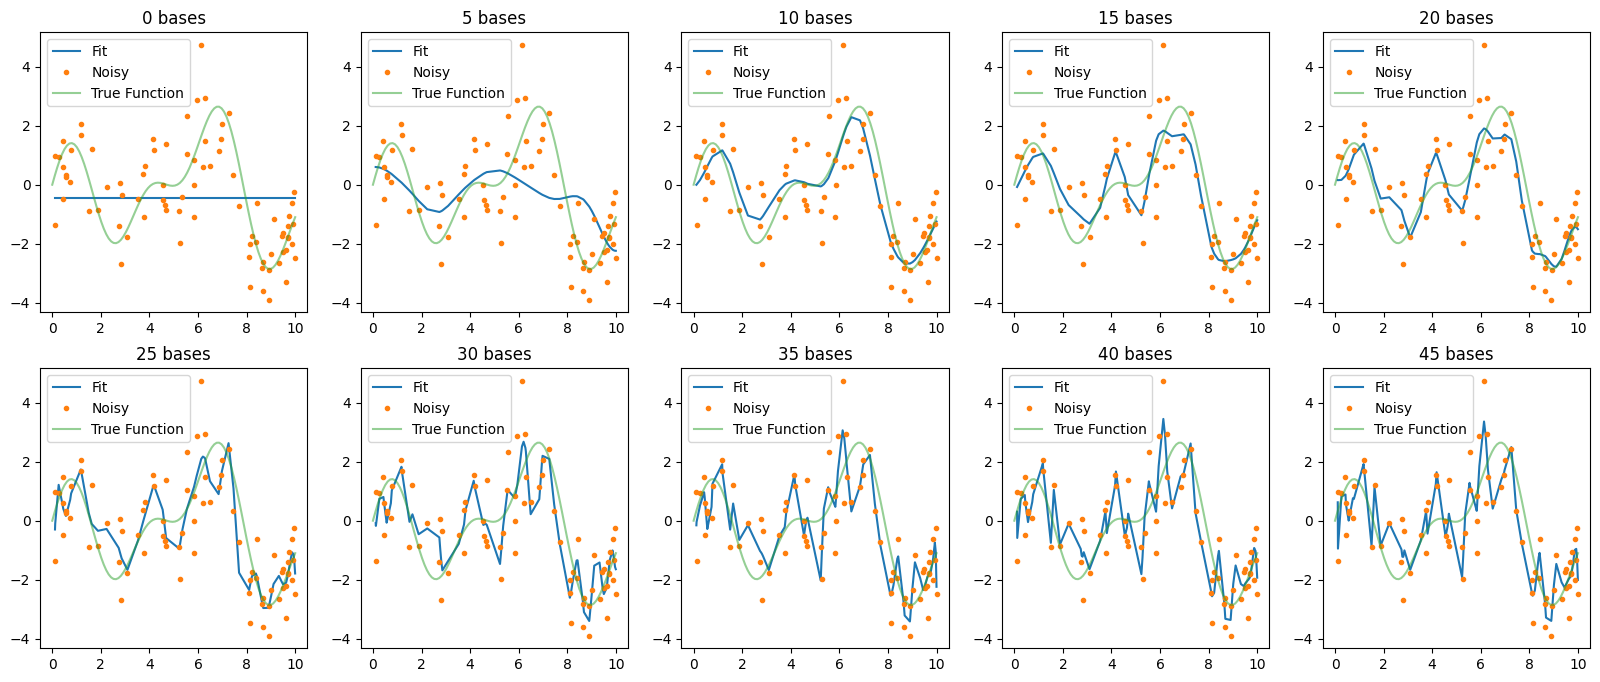

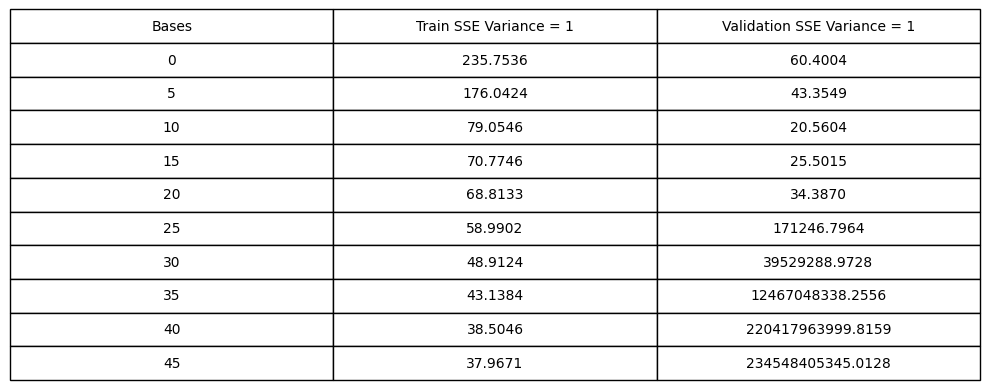

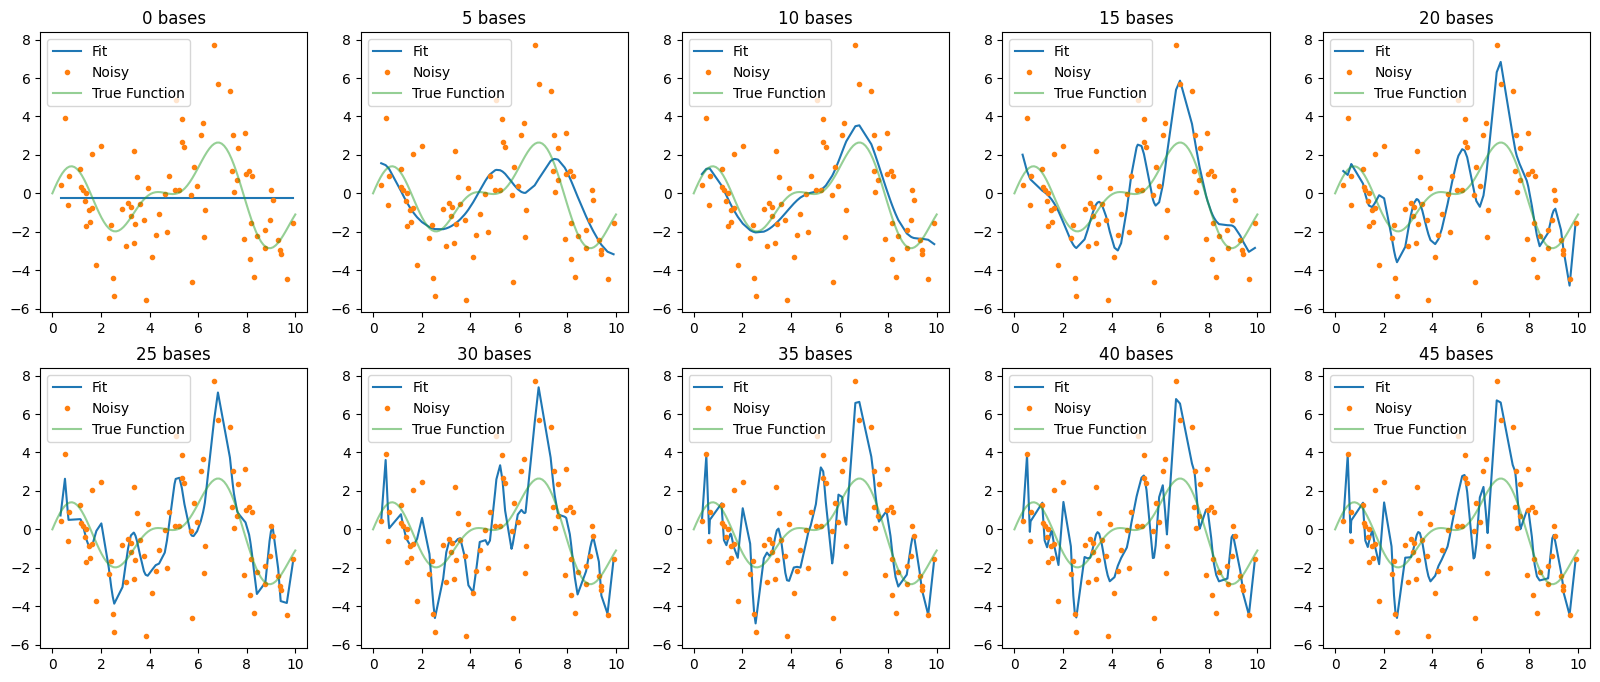

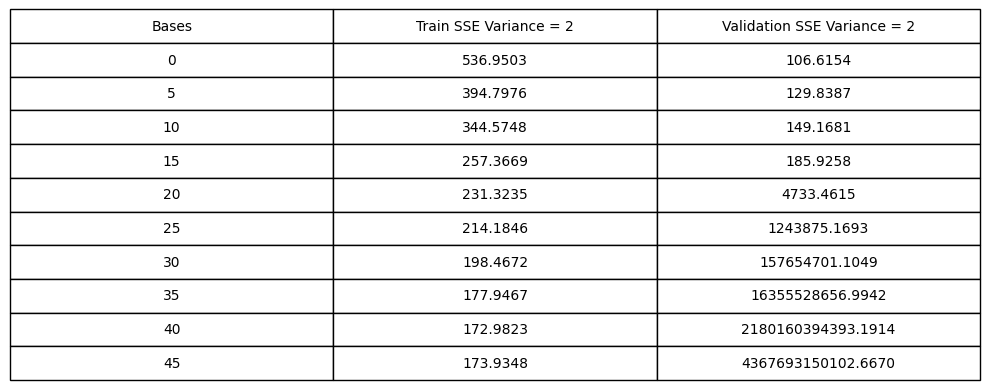

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Gaussian Bases
#1.2
def get_bases(D,x):
    '''retuns numpy.ndarray of D Gaussian bases'''
    gaussian = lambda x, mu, sigma: np.exp(-((x-mu)/sigma)**2)
    mu = []
    for d in range(D):
        mu.append(np.min(x) + (np.max(x)-np.min(x))/(D-1) * d)
    mu = np.array(mu)
    phi = gaussian(x[:,None], mu[None,:],1)
    return phi


class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self,x,y):
        if x.ndim == 1:
            x = x[:,None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        self.w = np.linalg.lstsq(x,y)[0]
        return self

    def predict(self,x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

#1.3 and 1.4
#Cost Function for prediction
def sse(y_predict, y_validation):
    sse = 0
    for i in range(len(y_predict)):
        sse += (y_predict[i] - y_validation[i])**2

    return sse



np.random.seed(42)#set seed for reproducibility
#get our sample data


spread = [0, 0.5, 1, 2]

for var in spread:
    x = np.random.rand(100) * 10
    epsilon = np.random.normal(0, var, 100)

    #function definitions
    f_clean = lambda x : np.log(x+1) * np.cos(x) + np.sin(2*x)
    f_noise = lambda x : np.log(x+1) * np.cos(x) + np.sin(2*x) + epsilon
    y_clean = f_clean(x)
    y_noise = f_noise(x)
    x_uniform = np.linspace(0,10,100)
    true_y = f_clean(x_uniform)

    #Split Data 80/20 split as usual
    #TODO
    X_train = x[:80]
    X_test = x[80:]
    Y_train = y_noise[:80]
    Y_test = y_noise[80:]
    #sort for better visualization
    #sort test splits
    sorted_train = np.argsort(X_train)
    sorted_test = np.argsort(X_test)
    X_train = X_train[sorted_train]
    X_test = X_test[sorted_test]
    Y_train = Y_train[sorted_train]
    Y_test = Y_test[sorted_test]

    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y_clean = y_clean[sorted_indices]
    y_noise = y_noise[sorted_indices]

    #to hold sse results
    sses_train = [] #array to hold the sse of train set of each model
    sses_validation = [] #array to hold the sse of validation set of each model

    fig = plt.figure(figsize=(20, 8))
    plt.subplot(2, 5, 1)
    #Fit and Predict empty feature matrix since zero bases
    #create empty feature matrix (0 features)
    phi_train = np.empty((len(X_train), 0))  # 80 x 0 matrix
    phi_test = np.empty((len(X_test), 0))  # 80 x 0 matrix
    model = LinearRegression().fit(phi_train,Y_train)
    yh_train = model.predict(phi_train)
    plt.title('0 bases')
    plt.plot(X_train, yh_train, '-', label='Fit')
    plt.plot(X_train, Y_train, '.', label='Noisy')
    #plot the true function
    plt.plot(x_uniform, true_y, alpha=.5, label='True Function')
    plt.legend()
    #compute sse for the model
    sses_train.append(sse(yh_train, Y_train))
    yh_validation = model.predict(phi_test)
    sses_validation.append(sse(yh_validation, Y_test))

    #plot the remaining 9 models
    for t in range(9):
        plt.subplot(2, 5, t+2)
        phi = get_bases((t+1)*5,X_train)
        phi_test = get_bases((t+1)*5,X_test)
        model = LinearRegression().fit(phi,Y_train)
        yh_train = model.predict(phi)
        plt.title(f'{(t+1)*5} bases')
        plt.plot(X_train, yh_train, '-', label='Fit')
        plt.plot(X_train, Y_train, '.', label='Noisy')
        #plot the true function
        plt.plot(x_uniform, true_y, alpha=.5, label='True Function')
        plt.legend()
        #compute sse for the model
        sses_train.append(sse(yh_train, Y_train) )
        yh_validation = model.predict(phi_test)
        sses_validation.append(sse(yh_validation, Y_test))

    plt.savefig('models.png')
    plt.show()

    #make table with sse results
    basis_counts = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')

    #Prepare table data
    table_data = [['Bases', f'Train SSE Variance = {var}', f'Validation SSE Variance = {var}']]
    for i, d in enumerate(basis_counts):
        table_data.append([str(d), f'{sses_train[i]:.4f}', f'{sses_validation[i]:.4f}'])

    #Create table
    table = ax.table(cellText=table_data, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)  # Scale height of cells
    plt.tight_layout()
    plt.savefig('sse.png',dpi=150,bbox_inches='tight')
    plt.show()